In [1]:
import pandas as pd


In [2]:
path = './StockHistoricalData/AMZ_historical.csv'
# with open(path, "r") as fp:
#     tmp_data = fp.readlines()
# tmp_data[:10]

In [3]:
# path = 'http://localhost:8888/edit/StockHistoricalData/AMZ_historical.csv'
df = pd.read_csv(path)
print (df)

            Date        Open        High         Low       Close     Volume  \
0     2012-01-03    8.794500    8.974000    8.777500    8.951500  102216000   
1     2012-01-04    8.960500    9.025000    8.803500    8.875500   84104000   
2     2012-01-05    8.797000    8.912500    8.702500    8.880500   76182000   
3     2012-01-06    8.903500    9.232500    8.875000    9.130500  140168000   
4     2012-01-09    9.138000    9.218500    8.850000    8.928000  101138000   
...          ...         ...         ...         ...         ...        ...   
2512  2021-12-27  171.037003  172.942993  169.215500  169.669495   58688000   
2513  2021-12-28  170.182495  172.175995  169.135498  170.660995   54638000   
2514  2021-12-29  170.839996  171.212006  168.600494  169.201004   35754000   
2515  2021-12-30  169.699997  170.888000  168.524002  168.644501   37584000   
2516  2021-12-31  168.955994  169.350006  166.558502  166.716995   47830000   

      Dividends  Stock Splits  
0             0    

In [4]:
def get_technical_indicators(dataset):
   # Create 7 and 21 days Moving Average
    ret_df = pd.DataFrame()
    ret_df['ma7'] = dataset['Close'].rolling(window=7).mean()
    ret_df['ma21'] = dataset['Close'].rolling(window=21).mean()
   
    # Create MACD
    ret_df['26ema'] = dataset['Close'].ewm(span=26).mean()
    ret_df['12ema'] = dataset['Close'].ewm(span=12).mean()
    ret_df['MACD'] = (ret_df['12ema']-ret_df['26ema'])

    # Create Bollinger Bands
    ret_df['20sd'] = dataset["Close"].rolling(20).std()
    ret_df['upper_band'] = ret_df['ma21'] + (ret_df['20sd']*2)
    ret_df['lower_band'] = ret_df['ma21'] - (ret_df['20sd']*2)

    # Create Exponential moving avera
    ret_df['ema'] = dataset['Close'].ewm(com=0.5).mean()

    # Create Momentum
    ret_df['momentum'] = dataset['Close']-1
    
    # Keep Price 
    ret_df['price'] = dataset['Close']

    return ret_df

In [5]:
MACD_df = get_technical_indicators(df)

MACD_df

In [6]:
MACD_df

,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,price
0,NaN,NaN,8.951500,8.951500,0.000000,NaN,NaN,NaN,8.951500,7.951500,8.951500
1,NaN,NaN,8.912038,8.910333,-0.001705,NaN,NaN,NaN,8.894500,7.875500,8.875500
2,NaN,NaN,8.900707,8.898689,-0.002018,NaN,NaN,NaN,8.884808,7.880500,8.880500
3,NaN,NaN,8.964947,8.971863,0.006916,NaN,NaN,NaN,9.050650,8.130500,9.130500
4,NaN,NaN,8.956379,8.959946,0.003567,NaN,NaN,NaN,8.968546,7.928000,8.928000
...,...,...,...,...,...,...,...,...,...,...,...
2512,169.737071,172.019573,172.005465,170.872064,-1.133401,2.881120,177.781813,166.257334,170.080147,168.669495,169.669495
2513,169.992785,171.802097,171.905875,170.839592,-1.066283,2.489139,176.780374,166.823820,170.467379,169.660995,170.660995
2514,169.876142,171.379359,171.705514,170.587501,-1.118013,2.363310,176.105978,166.652740,169.623129,168.201004,169.201004
2515,170.099786,171.059883,171.478772,170.288578,-1.190194,2.416104,175.892091,166.227674,168.970710,167.644501,168.644501


In [7]:
import matplotlib.pyplot as plt

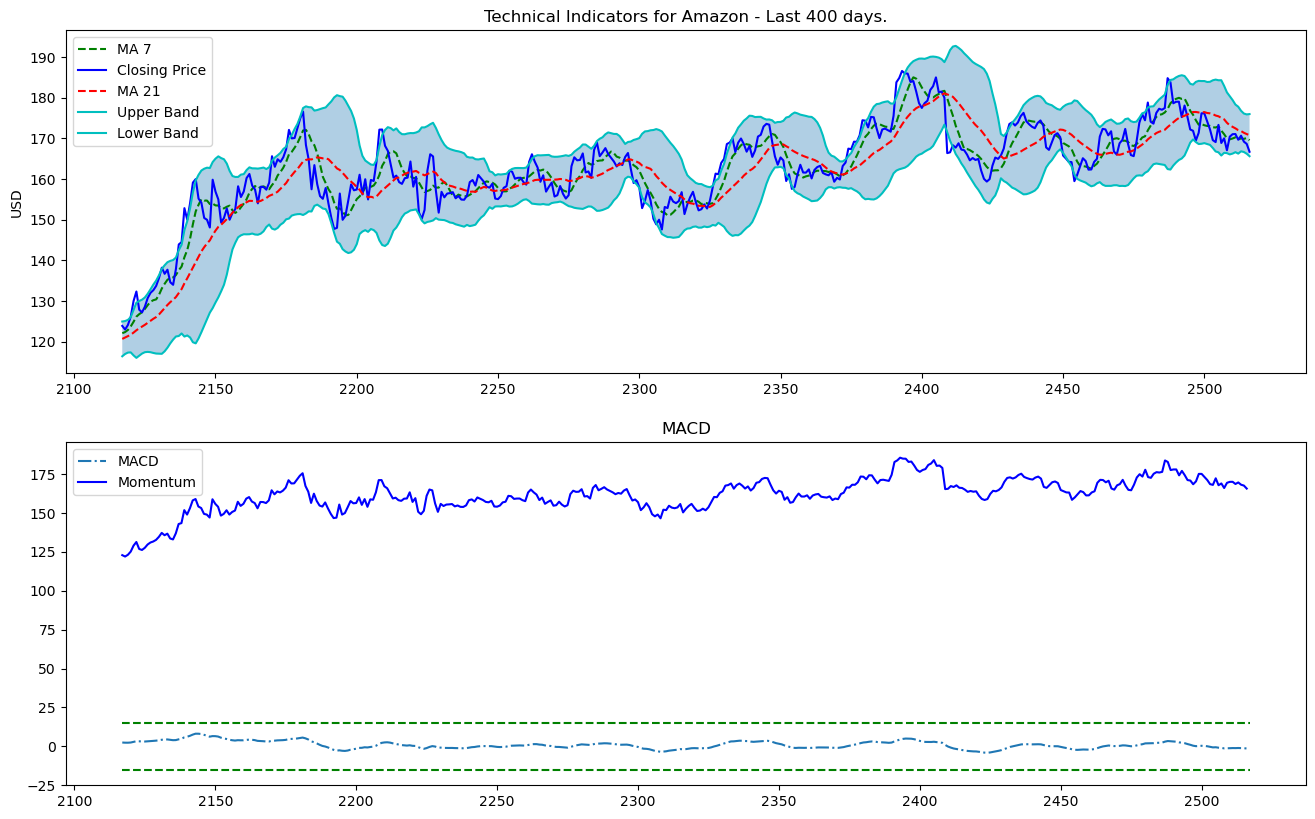

In [8]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)
   
   # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical Indicators for Amazon - Last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

   # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.savefig('MACD_fig.png')
    plt.show()

MACD_fig = plot_technical_indicators(MACD_df, 400)

In [9]:
MACD_df.head(21)

,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,price
0,NaN,NaN,8.951500,8.951500,0.000000,NaN,NaN,NaN,8.951500,7.9515,8.9515
1,NaN,NaN,8.912038,8.910333,-0.001705,NaN,NaN,NaN,8.894500,7.8755,8.8755
2,NaN,NaN,8.900707,8.898689,-0.002018,NaN,NaN,NaN,8.884808,7.8805,8.8805
3,NaN,NaN,8.964947,8.971863,0.006916,NaN,NaN,NaN,9.050650,8.1305,9.1305
4,NaN,NaN,8.956379,8.959946,0.003567,NaN,NaN,NaN,8.968546,7.9280,8.9280
5,NaN,NaN,8.958506,8.961660,0.003154,NaN,NaN,NaN,8.967514,7.9670,8.9670
6,8.954000,NaN,8.956104,8.957942,0.001838,NaN,NaN,NaN,8.952498,7.9450,8.9450
7,8.931857,NaN,8.930388,8.924252,-0.006136,NaN,NaN,NaN,8.848483,7.7965,8.7965
8,8.938357,NaN,8.928996,8.923608,-0.005388,NaN,NaN,NaN,8.896830,7.9210,8.9210
9,8.967286,NaN,8.950247,8.953813,0.003566,NaN,NaN,NaN,9.020946,8.0830,9.0830


In [12]:
# values = {"ma7":8.954000, "ma21":9.238143, "20sd":0.339056, "upper_band":9.914319,"lower_band":8.561966}

MACD_df.fillna(method="bfill",inplace=True)

In [13]:
MACD_df.head(21)

,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,price
0,8.954000,9.238143,8.951500,8.951500,0.000000,0.339056,9.914319,8.561966,8.951500,7.9515,8.9515
1,8.954000,9.238143,8.912038,8.910333,-0.001705,0.339056,9.914319,8.561966,8.894500,7.8755,8.8755
2,8.954000,9.238143,8.900707,8.898689,-0.002018,0.339056,9.914319,8.561966,8.884808,7.8805,8.8805
3,8.954000,9.238143,8.964947,8.971863,0.006916,0.339056,9.914319,8.561966,9.050650,8.1305,9.1305
4,8.954000,9.238143,8.956379,8.959946,0.003567,0.339056,9.914319,8.561966,8.968546,7.9280,8.9280
5,8.954000,9.238143,8.958506,8.961660,0.003154,0.339056,9.914319,8.561966,8.967514,7.9670,8.9670
6,8.954000,9.238143,8.956104,8.957942,0.001838,0.339056,9.914319,8.561966,8.952498,7.9450,8.9450
7,8.931857,9.238143,8.930388,8.924252,-0.006136,0.339056,9.914319,8.561966,8.848483,7.7965,8.7965
8,8.938357,9.238143,8.928996,8.923608,-0.005388,0.339056,9.914319,8.561966,8.896830,7.9210,8.9210
9,8.967286,9.238143,8.950247,8.953813,0.003566,0.339056,9.914319,8.561966,9.020946,8.0830,9.0830


In [14]:
MACD_df.to_csv("./MACD.csv")